# Accessing the project's API's

In [1]:
import os
import requests
import json
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
import Functions as F

## Automatic Update

In [2]:
h = F.Handles ()
database_fn = 'd:/repos/pirnacasestudy/data/database.db'
engine, connection, base, session = F.DbCon(database_fn)

### How to retrieve important Data?

In [4]:
SensorsAPI_df, Sensors_df = F.Handles.GetDivers(connection) #inowas sensors for project #DEU1 | Sensors_df = combination of sensors and variables that are monitored
h.GetMonitorintPointData (connection)

MonitoringPoints_df = h.MonitoringPoints_df #All Monitoring Points 

PointsWithDivers_df = h.PointsWithDivers_df #Points that have divers

GageData = h.GageData

DiversNextUpdate_df = h.DiversNextUpdate_df
FunctioningDivers_df = DiversNextUpdate_df [(DiversNextUpdate_df.IOT == 1) & (DiversNextUpdate_df.Functioning ==1)].reset_index (drop = True)
FunctioningDivers_df

MonitoringPointID  PointID MonitoringPointName  ReferenceAltitude  Type  \
0                 23       26               GWM02             117.98  Well   
1                 24       27               GWM03             117.88  Well   
2                 26       29               GWM05             117.87  Well   
3                 13       16              G21neu             116.46  Well   
4                 15       18                 G24             119.56  Well   
5                 20       23                 G29             120.14  Well   
6                 21       24                 G30             118.89  Well   
7                 18       21                 G27             118.33  Well   

  TypeOfAltitude  MonitoringPointID  DiverID DiverName  IOT  Functioning  \
0       Top Case                 23       11       I-2    1            1   
1       Top Case                 24       12       I-3    1            1   
2       Top Case                 26       13       I-5    1            1   
3       Top Case                 13       15       123    1            1   
4       Top Case                 15       16       124    1            1   
5       Top Case                 20       17       125    1            1   
6       Top Case                 21       18       126    1            1   
7       Top Case                 18       19       127    1            1   

   PointsID          E          N        NextUpdate_t  NextUpdate_ts  
0        26  13.923774  50.965905 2022-12-13 13:00:00     1670936400  
1        27  13.923764  50.965858 2022-12-13 13:00:00     1670936400  
2        29  13.923778  50.965812 2022-12-13 23:00:00     1670972400  
3        16  13.922611  50.965332 2022-11-30 11:00:00     1669806000  
4        18  13.924817  50.966529 2022-12-12 13:00:00     1670850000  
5        23  13.922332  50.966438 2022-12-14 13:00:00     1671022800  
6        24  13.924894  50.966210 2022-12-13 13:00:00     1670936400  
7        21  13.924870  50.965741 2022-11-28 13:00:00     1669640400

### Update from the LastUpdate_ts DiverName columns

In [ ]:
def SequenceUpdate (sensor, sts):
    handles = Handles()
    handles.GetDiverData(sensor = sensor, connection = connection)
    api  = LongUpdateDiverData(handles, sensor, connection = connection)
    ets = round(pd.to_datetime(datetime.now()).value / 1e9)
    for p in api.parameters.VariableName:
        api.Request(sensor, p, sts, ets)
        api.Process()
        api.Update()
        print (f'River data updated from ID {api.Process_df.iloc[0,0]} to ID {api.Process_df.iloc[-1,0]} for sensor {sensor} parameter {p}')

In [ ]:
def InowasLongAPItoSQL (database_dn = database_fn):
    t0 = time.perf_counter()
    engine, connection, base, session = DbCon(database_fn)
    
    h = Handles ()
    SensorsAPI_df, Sensors_df = Handles.GetDivers(connection)
    h.GetMonitorintPointData (connection)
    DiversLastUpdate_df = h.DiversLastUpdate_df
    FunctioningDivers_df = DiversLastUpdate_df [(DiversLastUpdate_df.IOT == 1) & (DiversLastUpdate_df.Functioning ==1)].reset_index (drop = True) 
    
    t1 = time.perf_counter()
    print(f'                   The running time was {round(t1-t0)} s')

In [ ]:
sensors_list = ['123', '124', '125', '126', '127']
sts_list = [1668445200, 1668448800, 1668448800, 1669032000, 1668452400 ]
for i,sensor in enumerate(sensors_list):
    SequenceUpdate(sensor, sts_list[i])

In [4]:
t, ts = F.Handles.GetAPIDate (connection, GageData.MonitoringPointID.iloc[0])
print(f'Last Update for River data was {t}')

Last Update for River data was 2022-12-13 17:00:00


## River Data

In [1]:
import Functions as F
from datetime import datetime
import pandas as pd

In [26]:
database_fn = 'd:/repos/pirnacasestudy/data/database.db'
engine, connection, base, session = F.DbCon(database_fn)

In [27]:
UpdateID = F.Handles.GetUpdateID (connection)
print( f'Delete from ID {UpdateID} in case it is wanted')

Delete from ID 1078477 in case it is wanted


In [28]:
handles = F.Handles()

handles.GetMonitorintPointData(connection = connection)
GageData = handles.GageData
api = F.UpdateRiverData(handles, connection)
api.Request( )
api.Process( )
api.Update( )

'River data updated from ID 1078477 to ID 1086390'

### Delete Update

In [ ]:
from sqlalchemy import MetaData, Table


# initialize the Metadata Object
meta = MetaData(bind=engine)
MetaData.reflect(meta)
# n = UpdateID  
n = 1078477 
d = table.delete().where(table.c.ID >= n)
# d.execute()
table = Table('PointsMeasurements', meta, autoload=True)

#delete commands

## Long request for Inowas Data - With Classes

In [2]:
database_fn = 'd:/repos/pirnacasestudy/data/database.db'
engine, connection, base, session = F.DbCon(database_fn)

In [4]:
UpdateID2 = F.Handles.GetUpdateID (connection)
print( f'Delete from ID {UpdateID2} in case it is wanted')

Delete from ID 1086391 in case it is wanted


In [6]:
UpdateID = F.Handles.GetUpdateID (connection)
print( f'Delete from ID {UpdateID} in case it is wanted')

Delete from ID 1086391 in case it is wanted


In [8]:
def SequenceUpdate (sensor):
    handles = F.Handles()
    handles.GetDiverData(sensor = sensor, connection = connection)
    api  = F.LongUpdateDiverData(handles, sensor, connection = connection)
    for p in api.parameters.VariableName:
        api.Request(sensor, p, sts, ets)
        api.Process()
        api.Update()
        print (f'River data updated from ID {api.Process_df.iloc[0,0]} to ID {api.Process_df.iloc[-1,0]} for sensor {sensor} parameter {p}')

In [9]:
et = pd.to_datetime(datetime.now())
ets = int (et.value / 1e9)
sts = 1668445200
for sensor in ['I-2', 'I-3', 'I-5']:
    SequenceUpdate(sensor)

River data updated from ID 1086391 to ID 1087082 for sensor I-2 parameter ec_25
River data updated from ID 1087083 to ID 1087774 for sensor I-2 parameter ec
River data updated from ID 1087775 to ID 1088466 for sensor I-2 parameter h_level
River data updated from ID 1088467 to ID 1089158 for sensor I-2 parameter v_batt
River data updated from ID 1089159 to ID 1089850 for sensor I-2 parameter t
River data updated from ID 1089851 to ID 1090542 for sensor I-2 parameter ph
River data updated from ID 1090543 to ID 1091234 for sensor I-2 parameter ldo
River data updated from ID 1091235 to ID 1091926 for sensor I-3 parameter ec_25
River data updated from ID 1091927 to ID 1092618 for sensor I-3 parameter ec
River data updated from ID 1092619 to ID 1093310 for sensor I-3 parameter h_level
River data updated from ID 1093311 to ID 1094002 for sensor I-3 parameter v_batt
River data updated from ID 1094003 to ID 1094694 for sensor I-3 parameter t
River data updated from ID 1094695 to ID 1095386 for 

In [10]:
def SequenceUpdate (sensor, sts):
    handles = F.Handles()
    handles.GetDiverData(sensor = sensor, connection = connection)
    api  = F.LongUpdateDiverData(handles, sensor, connection = connection)
    for p in api.parameters.VariableName:
        api.Request(sensor, p, sts, ets)
        api.Process()
        api.Update()
        print (f'River data updated from ID {api.Process_df.iloc[0,0]} to ID {api.Process_df.iloc[-1,0]} for sensor {sensor} parameter {p}')

In [11]:
sensors_list = ['123', '124', '125', '126', '127']
sts_list = [1668445200, 1668448800, 1668448800, 1669032000, 1668452400 ]
for i,sensor in enumerate(sensors_list):
    SequenceUpdate(sensor, sts_list[i])

River data updated from ID 1100923 to ID 1101300 for sensor 123 parameter ec_25
River data updated from ID 1101301 to ID 1101678 for sensor 123 parameter ec
River data updated from ID 1101679 to ID 1102056 for sensor 123 parameter h_level
River data updated from ID 1102057 to ID 1102434 for sensor 123 parameter v_batt
River data updated from ID 1102435 to ID 1102812 for sensor 123 parameter t
River data updated from ID 1102813 to ID 1103479 for sensor 124 parameter ec_25
River data updated from ID 1103480 to ID 1104146 for sensor 124 parameter ec
River data updated from ID 1104147 to ID 1104813 for sensor 124 parameter h_level
River data updated from ID 1104814 to ID 1105480 for sensor 124 parameter v_batt
River data updated from ID 1105481 to ID 1106147 for sensor 124 parameter t
River data updated from ID 1106148 to ID 1106790 for sensor 125 parameter ec_25
River data updated from ID 1106791 to ID 1107433 for sensor 125 parameter ec
River data updated from ID 1107434 to ID 1108076 fo

### Check Results

Iterative process here.

In [ ]:
import os
from datetime import datetime, timedelta
import time
import requests
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, update, Table, MetaData
import CreateDatabase as db
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base
import Functions as F
import Querying as Q
import matplotlib.pyplot as plt

2022-12-12 10:35:22,648 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-12-12 10:35:22,648 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("TestsType")
2022-12-12 10:35:22,648 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-12-12 10:35:22,648 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Divers")
2022-12-12 10:35:22,648 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-12-12 10:35:22,664 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Variables")
2022-12-12 10:35:22,664 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-12-12 10:35:22,664 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Points")
2022-12-12 10:35:22,664 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-12-12 10:35:22,664 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("DrillingTests")
2022-12-12 10:35:22,664 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-12-12 10:35:22,664 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("MonitoringPoints")
2022-12-12 10:35:22,664 INFO sqlalchemy.engine.En

In [ ]:
database_fn = 'd:/repos/pirnacasestudy/data/database.db'

In [ ]:
q = Q.TimeSeries(database_fn, 0)

In [ ]:
df = q.DataFrame.copy()

In [ ]:
df.shape

(612495, 10)

In [ ]:
df.Date.max()

Timestamp('2022-12-11 12:00:00')

In [ ]:
df1 = df [(df.Date > pd.to_datetime('2022-02-01')) & (df.MonitoringPointID == 18)]
df1.head()

MonitoringPointID   TimeStamp  VariableID   Value  ID Name  PointID  \
612311                 18  1668452400           0  109.49  18  G27       21   
612312                 18  1668456000           0  109.49  18  G27       21   
612313                 18  1668459600           0  109.48  18  G27       21   
612314                 18  1668463200           0  109.48  18  G27       21   
612315                 18  1668466800           0  109.48  18  G27       21   

               E          N                Date  
612311  13.92487  50.965741 2022-11-14 19:00:00  
612312  13.92487  50.965741 2022-11-14 20:00:00  
612313  13.92487  50.965741 2022-11-14 21:00:00  
612314  13.92487  50.965741 2022-11-14 22:00:00  
612315  13.92487  50.965741 2022-11-14 23:00:00

In [ ]:
df1.shape

(661, 10)

In [ ]:
df1 [np.isnan(df1.Value)]

Empty DataFrame
Columns: [MonitoringPointID, TimeStamp, VariableID, Value, ID, Name, PointID, E, N, Date]
Index: []

In [ ]:
pd.period_range(min(df1.Date), max(df1.Date), freq = 'H')

PeriodIndex(['2022-11-01 00:00', '2022-11-01 01:00', '2022-11-01 02:00',
             '2022-11-01 03:00', '2022-11-01 04:00', '2022-11-01 05:00',
             '2022-11-01 06:00', '2022-11-01 07:00', '2022-11-01 08:00',
             '2022-11-01 09:00',
             ...
             '2022-11-28 03:00', '2022-11-28 04:00', '2022-11-28 05:00',
             '2022-11-28 06:00', '2022-11-28 07:00', '2022-11-28 08:00',
             '2022-11-28 09:00', '2022-11-28 10:00', '2022-11-28 11:00',
             '2022-11-28 12:00'],
            dtype='period[H]', length=661)

**The filling dates in the F.PrepareRiverData function worked well.**

In [ ]:
df1 = df [(df.VariableID == 0) & (df.MonitoringPointID == 23)]
df1.shape

(32611, 10)

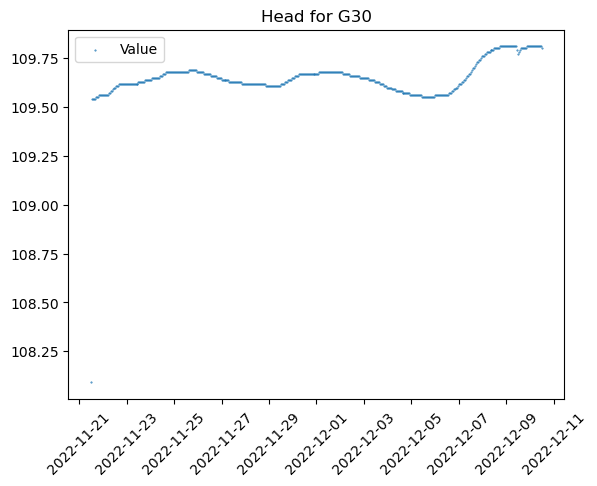

In [ ]:
df1 = df [(df.VariableID == 0) & (df.MonitoringPointID == 21)]
# df1 = df1 [df.Date > pd.to_datetime('2022-11-14 18:00')]
fig = plt.subplots()
plt.scatter('Date', 'Value', data = df1 , marker = 'o', s = 0.2)
plt.xticks(rotation = 45)
plt.title(f'Head for {df1.Name.unique()[0]}')
plt.legend()
plt.show()

In [ ]:
threshold_date = df1.iloc[0,:].Date
threshold_ts = df1.iloc[0,:].TimeStamp
threshold_date,threshold_ts

(Timestamp('2022-11-14 19:00:00'), 1668452400)

In [ ]:
x = df1 [df1.Value < 108.5].TimeStamp.diff() < 3600
x [x]

Series([], Name: TimeStamp, dtype: bool)

In [ ]:
threshold_date = df1 [df1.Value < 108.5].iloc[-1,:].Date
threshold_ts = df1 [df1.Value < 108.5].iloc[-1,:].TimeStamp
threshold_date,threshold_ts

(Timestamp('2022-11-14 17:00:00'), 1668445200)

#### we see problems in the divers that were installed recently. Below I delete the values that were not reading by establishing a visual threshold according to the graph above

#### Undo addition

In [ ]:
engine, connection, base, session = DbCon(database_fn)

# initialize the Metadata Object
meta = MetaData(bind=engine)
MetaData.reflect(meta)

table = Table('PointsMeasurements', meta, autoload=True)


#delete commands
n = 1078477 #number before adding tables
d = table.delete().where(table.c.ID > n)
# d.execute()

In [ ]:
parameters_query = 'select Name from Variables'
parameters_db = pd.read_sql(parameters_query, con = connection)

In [ ]:
request = requests.get('https://sensors.inowas.com/list').json()
request_index = [ i for i in request if i['project'] == 'DEU1']
sensors_df = pd.DataFrame(request_index)

In [ ]:
parameters_df = sensors_df [ sensors_df.name == '128'].parameters.reset_index(drop=True)

In [ ]:
parameters_df

Series([], Name: parameters, dtype: object)

### Undo Inowas

In [ ]:
#Update UTI Sensors
et = pd.to_datetime(datetime.now())
ets = int (et.value / 1e9)


# monitoring point 13 - g21neu - (Timestamp('2022-11-14 17:00:00'), 1668445200)
sts = 1668445200
F.LongUpdatePInw(database_fn, '123', sts, ets, 0) 

# monitoring point 15 - g24 - (Timestamp('2022-11-14 18:00:00'), 1668448800)
sts = 1668448800
F.LongUpdatePInw(database_fn, '124', sts, ets, 0)

#monitoring point 20 - g29 - OK
# F.LongUpdatePInw(database_fn, '125', sts, ets, 0)

#monitoring point 21 - g30 - (Timestamp('2022-11-21 12:00:00'), 1669032000)
sts = 1669032000
F.LongUpdatePInw(database_fn, '126', sts, ets, 0)

#monitoring point 18 - g27 - (Timestamp('2022-11-14 19:00:00'), 1668452400)
sts = 1668452400
F.LongUpdatePInw(database_fn, '127', sts, ets, 0)

In [41]:
from sqlalchemy import MetaData, Table


# initialize the Metadata Object
meta = MetaData(bind=engine)
MetaData.reflect(meta)
table = Table('PointsMeasurements', meta, autoload=True)

#delete commands
n = int(UpdateID2) 
d = table.delete().where(table.c.ID >= 1086391 )
d.execute()

## New API Inowas

```python
[11:06 PM, 23/11/2022] Ralf Junghanns INOWAS 🇩🇪: https://sensors.inowas.com/sensors/project/DEU1/latest
[11:15 PM, 23/11/2022] Ralf Junghanns INOWAS 🇩🇪: https://sensors.inowas.com/sensors/project/DEU1/latest?since=1669065118
[11:15 PM, 23/11/2022] Ralf Junghanns INOWAS 🇩🇪: con timestamp
```

### API works for november on, only

We need to test if in December it still gets November os it is only the last month
When I tried on the 25th of november, it only got values until the 25th of October. Now (29/11) it getting from 01/11.
Sum an hour more otherwise it fetches repeated dates

In [13]:
import requests

In [16]:
ts1 = 1669065118
dt = pd.to_datetime(ts1 * 1e9)
URL = f'https://sensors.inowas.com/sensors/project/DEU1/latest?since={ts1}'
r = requests.get(URL).json()

In [17]:
df = pd.DataFrame(r)

In [18]:
df

project_name sensor_name parameter_name     timestamp    value
0             DEU1         124        h_level  1.669068e+09    0.841
1             DEU1         123             ec  1.669068e+09    0.427
2             DEU1         I-2              t  1.669068e+09    0.000
3             DEU1         I-5             ec  1.669068e+09    0.423
4             DEU1         123         v_batt  1.669068e+09    5.250
...            ...         ...            ...           ...      ...
26965         DEU1         I-2             ph  1.670933e+09    0.000
26966         DEU1         I-2            ldo  1.670933e+09    0.000
26967         DEU1         126        h_level  1.670933e+09    1.599
26968         DEU1         I-2       t_intern  1.670933e+09    3.570
26969         DEU1         I-2              t  1.670933e+09 -273.140

[26970 rows x 5 columns]

In [20]:
df['Time'] = pd.to_datetime(df.timestamp * 1e9)

In [22]:
df.Time.min()

Timestamp('2022-11-21 22:00:00')

In [23]:
df.Time.max()

Timestamp('2022-12-13 12:00:00')

In [ ]:
df.timestamp.max()

In [ ]:
for i,j in r[1].items():
    print(i,j)
    

In [ ]:
import datetime, time
import pandas as pd

In [ ]:
date_time = datetime.datetime(2021, 7, 26, 21, 20)

ts = time.mktime(date_time.timetuple())
date_time = datetime.datetime(2021, 11, 21, 11, 58)
ts = time.mktime(date_time.timetuple())


date_time2 = datetime.datetime.fromtimestamp(1669065118) 

print(date_time, ts, date_time2)

In [ ]:
pd.to_datetime(ts, unit = 's')

In [ ]:
pd.to_datetime(ts1, unit = 's')

In [ ]:
ts1

In [ ]:
# # %%time
date_time = datetime.datetime(2021, 11 , 25, 0, 0)
ts = time.mktime(date_time.timetuple())
URL = f'https://sensors.inowas.com/sensors/project/DEU1/latest?since={int(ts)}'
# request = requests.get(URL).json()

# fig = plt.subplots()
# df = pd.DataFrame(request)
# df.insert(1, 'Date', pd.to_datetime(df['timestamp'], unit='s'))
# plt.scatter('Date', 'value', data = df[(df.parameter_name == 'h') > (df.value < -99 )])
# plt.xticks(rotation = 45)
# plt.title(f'Head for the query {date_time}')
# plt.legend()
# plt.savefig('test-api.jpeg')
# plt.show()


### API works for november on, only

### We need to test if in December it still gets November os it is only the last month
### When I tried on the 25th of november, it only got values until the 25th of October. Now (29/11) it getting from 01/11.
## Sum an hour more otherwise it fetches repeated dates

## How to Update Table

In [ ]:

# session.query(db.PointsMeasurements).filter(db.PointsMeasurements.VariableID == 9).\
#     update({'VariableID' : db.PointsMeasurements.VariableID -2})

# session.commit()